In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kaleido

### 1. Class Imbalances

In [2]:
df = pd.read_csv('../data/raw/SentimentLabeled_10112022.csv')
df.head(3)

,date,text,userid_str,status_id_str,id,name,birth,term_partisanship,term_type,term_state,country,Bucket,SentimentScore,version
0,2015-09-28,I commend all of law enforcement for the secur...,156333623.0,6.485341e+17,3517566,Al Green,1947-09-01,Democrat,rep,TX,China,2 or 3,NaN,2019_batch1
1,2019-02-24,"Socialist tyrant Maduro starves, tortures his ...",235312723.0,1.099734e+18,3559992,Scott DesJarlais,1964-02-21,Republican,rep,TN,China,1,2.0,2019_batch1
2,2019-02-24,"Socialist tyrant Maduro starves, tortures his ...",235312723.0,1.099734e+18,3559992,Scott DesJarlais,1964-02-21,Republican,rep,TN,Iran,2 or 3,NaN,2019_batch1


Text(0.5, 1.0, 'Distribution of Parties in Data')

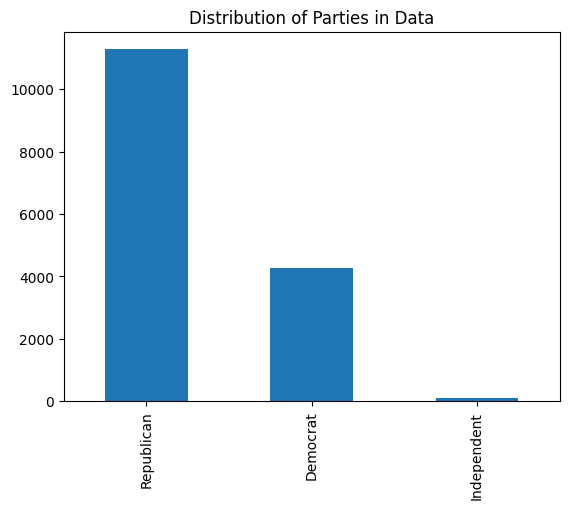

In [3]:
def get_party(party):
    
    if not pd.isnull(party):
        if 'Republican' in party:
            party = 'Republican'
        elif 'Democrat' in party:
            party = 'Democrat'
        
    return party

def get_state(state):
    
    if not pd.isnull(state):
        if '{' in state:
            start = state.index('{') + 1
            end = state.index('}')
            state = state[start:end]

    return state
        
        

df['term_partisanship'] = df['term_partisanship'].apply(get_party)
df['term_partisanship'].value_counts().plot(kind='bar')
plt.title('Distribution of Parties in Data')

In [6]:
import plotly.express as px

df['term_state'] = df['term_state'].apply(get_state)
fig = px.histogram(df, x = 'term_state', title = 'Distribution of Tweets by State', labels = {'term_state': 'State', 'count':'Count'})
fig.show()

#fig.write_image('state_distribution.png')